In [1]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize
from matplotlib.ticker import MaxNLocator
#custom modules
import importlib as il
from toolbox import as_toolbox as ast
from toolbox import vis
from toolbox import fits
from iminuit import Minuit
from toolbox.ExternalFunctions import UnbinnedLH

## 0 

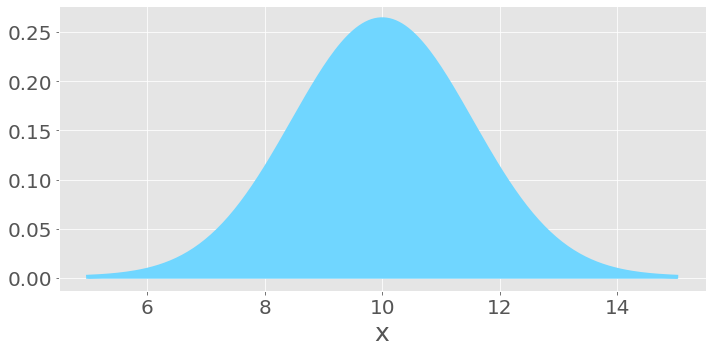

(<AxesSubplot:xlabel='x'>, <Figure size 720x360 with 1 Axes>)

In [109]:
x = np.linspace(5,15,200)
y = stats.norm.pdf(x, 10, np.sqrt(2.3))
color = vis.Color_palette(1)[0]
vis.nice_plot(
    x, y, legend_off=True, save_plot=True, figname='Gauss.pdf', color=color,
    linewidth=4, fill_under_curve=True, fill_color=color)

# Generate MC/ find MLE 

## function 

In [244]:
alpha_real, beta_real = .9, .55 
xmin, xmax = -1.02, 1.11
def func_pdf(x, alpha = alpha_real, beta = beta_real): 
    return (1 + alpha*x + beta*x**2)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3)
ymax = func_pdf(xmax, alpha_real, beta_real)
xaxis = np.linspace(xmin,xmax,100)
yaxis = func_pdf(xaxis, alpha_real, beta_real)

In [245]:
#generate points
N_f = 807
ymax = func_pdf(xmax, alpha_real, beta_real) 
x_rand = ast.accept_reject(func_pdf, N_f, xmin, xmax, ymax)

In [246]:
#perform the fit using unbinned log likelihood
ullh_f = UnbinnedLH(func_pdf, x_rand)
f_minuit = Minuit(ullh_f,  pedantic=False, print_level=1)
f_minuit.migrad();       # This is where the minimisation is carried out!
alpha_fit, beta_fit = f_minuit.args

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 513.6                      │         Nfcn = 49 (49 total)         │
│ EDM = 4.95e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


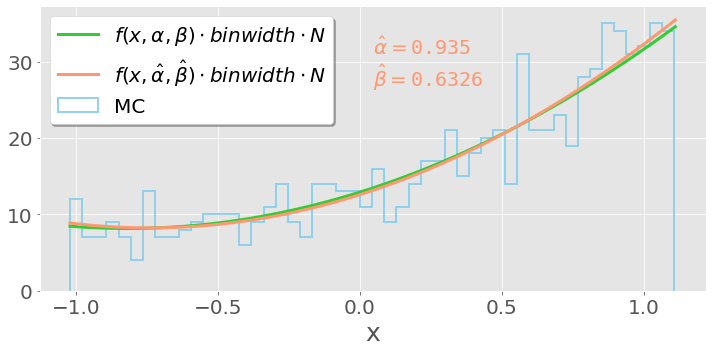

In [247]:
#show results
colors = vis.Color_palette(1)
n_bins = 50
binwidth = (xmax-xmin)/n_bins
yaxis = func_pdf(xaxis, alpha_real, beta_real)*binwidth*N_f

fig, ax = plt.subplots(figsize = (10,5))
_, _, _, fig, ax = vis.nice_histogram(
    x_rand, n_bins, axis = ax, figure = fig, show_plot = False, plot_errors=False, plot_hist=True, 
    data_label_hist = 'MC', plot_legend = True, color_hist = 'skyblue')
ax, fig = vis.nice_plot(
    xaxis, yaxis, axis = ax, figure = fig, show_plot=False,
    color = 'limegreen', data_label = r'$f(x, \alpha, \beta)\cdot binwidth \cdot N$')
ax, fig = vis.nice_plot(
        xaxis, func_pdf(xaxis, alpha_fit, beta_fit)*N_f*binwidth, axis = ax, figure = fig, 
        show_plot=False,color = colors[2], data_label = r'$f(x, \hat\alpha, \hat\beta)\cdot binwidth \cdot N$')
text = r'$\hat\alpha = $'+ '{:4.4}'.format(alpha_fit) + '\n' + r'$\hat\beta= $'+ '{:4.4}'.format(beta_fit)
ax.text(.5, .9, text, fontsize=20,  family='monospace', 
                    transform=ax.transAxes, color=colors[2], verticalalignment='top', horizontalalignment ='left')
fig

In [252]:
a_file = open("pdf_quadr.txt", "w")
np.savetxt(a_file, x_rand)
a_file.close()

## Poisson 

In [254]:
N = 513
mu_real = 3.8
x_poisson = stats.poisson.rvs(mu = mu_real, size = N, random_state = 4) #generate values
x_poisson = x_poisson.astype(int)
n_bins = 40
bins = np.arange(-.5,x_poisson.max()+.5)#shift bins
def poisson(x,mu): return stats.poisson.pmf(x, mu)

In [255]:
#perform fit
ullh = ast.UNLLH(poisson, x_poisson) #This should be minimized
poisson_minuit = Minuit(ullh, mu = 5, pedantic=False, print_level=1)
poisson_minuit.migrad();       # This is where the minimisation is carried out!
mu_fit = float(poisson_minuit.args[0])

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1074                       │         Nfcn = 18 (18 total)         │
│ EDM = 1.85e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


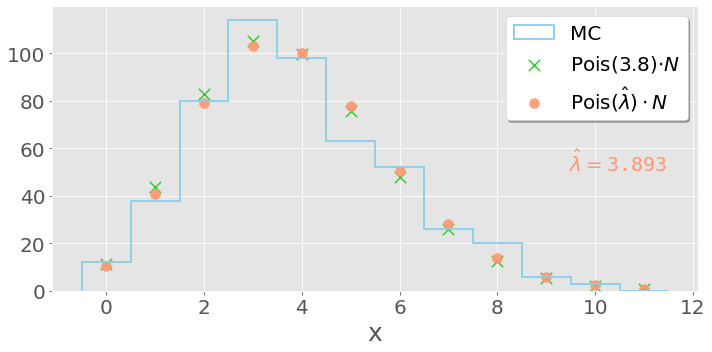

In [331]:
#show results
colors = vis.Color_palette(1)
xaxis = np.arange(12)
yaxis = stats.poisson.pmf(xaxis, mu = 3.8)*N
ax, fig = vis.nice_plot(xaxis, yaxis, show_plot=False, color = 'limegreen', data_label = 'Pois(3.8)' + r'$\cdot N$', scatter = True,
                       scr_markersize=130, scr_markerstyle='x')
x, y, binwidth, fig, ax = vis.nice_histogram(
    x_poisson, bins, axis = ax, figure = fig, show_plot = False, plot_errors=False, plot_hist=True, 
    data_label_hist = 'MC',plot_legend = True, color_hist = 'skyblue', histtype='step')
fit_label = 'Pois' + r'$(\hat\lambda)\cdot N$'
ax, fig= vis.nice_plot(
    xaxis, poisson(xaxis, mu_fit)*N*binwidth, axis = ax, figure = fig, show_plot = False, 
    data_label = fit_label, color = colors[2], scatter = True, scr_markersize=100, alpha=.9,
    figname = 'Poisson.png', save_plot = True)

text = r'$\hat\lambda = $'+ '{:4.4}'.format(mu_fit)
ax.text(.8, .5, text, fontsize=20,  family='monospace', 
                    transform=ax.transAxes, color=colors[2], verticalalignment='top', horizontalalignment ='left')
fig

In [266]:
a_file = open("pmf_poisson.txt", "w")
x_poisson.astype(int)
np.savetxt(a_file, x_poisson,fmt='%.i')
a_file.close()

In [268]:
a_file = open("fitted_params.txt", "w")
a_file.write('alpha = '+f'{alpha_fit}' + '\n')
a_file.write('beta = '+f'{beta_fit}'+ '\n')
a_file.write('lambda = '+f'{mu_fit}'+ '\n')
a_file.close()

# Dark Matter 

In [286]:
from scipy import constants

In [288]:
df

,r to center [kpc],r to center [m],measured velocity [km/s],measured velocity [m/s]
0,5.0,1.542839e+20,333.493936,333493.936491
1,5.0,1.542839e+20,377.729740,377729.739793
2,5.0,1.542839e+20,392.865305,392865.305310
3,5.0,1.542839e+20,303.764161,303764.160594
4,5.0,1.542839e+20,254.110246,254110.245905
...,...,...,...,...
245,200.0,6.171355e+21,289.462571,289462.570838
246,200.0,6.171355e+21,302.556720,302556.719638
247,200.0,6.171355e+21,225.757673,225757.673187
248,200.0,6.171355e+21,287.362002,287362.002024


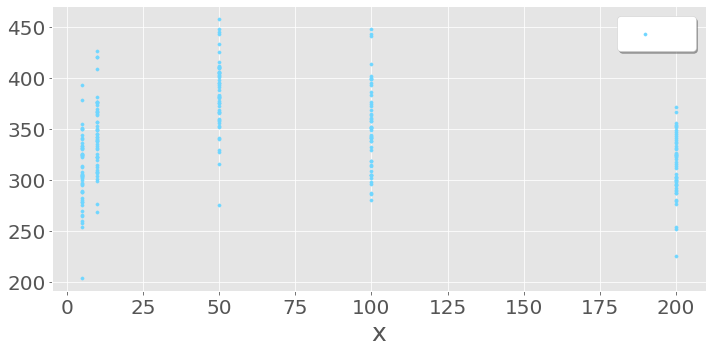

(<AxesSubplot:xlabel='x'>, <Figure size 720x360 with 1 Axes>)

In [285]:
df = pd.read_csv('velocity_vs_radius.csv')
radii = df['r to center [kpc]']
vel = df['measured velocity [km/s]']
vis.nice_plot(radii, vel, scatter = True, color = colors[0], scr_markersize=10)

In [328]:
h_si = 4.629e20
radii_si = df['r to center [m]']
MNM= np.tile(np.array([2.85e40, 3.838e40, 4.0e40,4.0e40,4.0e40]) , (len(radii_si),1))
def f_MNM(r): 
    mask = radii_si == r
    radii = radii_si[mask]
    return MNM[radii_si == r]
def f_MDM(r, mdm_tot): mdm_tot * (np.log((h_si+r)/h_si) + h_si/(h_si+r) - 1)
def f_velocity(r, mdm_tot): 
    return np.sqrt(constants.G*(f_MDM(r, mdm_tot) + f_MNM(r))/r)

In [306]:
# plot for different total masses of dm
MDM_tot = np.array([0, 2e42, 1.4e43])
Velocity_pred =  [f_velocity(radii_si, mdm_tot) for mdm_tot in MDM_tot]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1250 but corresponding boolean dimension is 250